In [50]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [51]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
print(dataset_train)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]


In [52]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [53]:
# Perform the feature scaling 
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [54]:
x_train = []
y_train = []

In [55]:
for i in range(60,len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [56]:
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [57]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [58]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 
from keras.layers import Dropout 

model = Sequential()

In [59]:
# Add LSTM layer 
model.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

# Add Regularization 
model.add(Dropout(0.2))

model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_13 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_14 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_18 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_15 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_19 (LSTM)              (None, 50)               

In [60]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 10,batch_size = 32)

Epoch 1/10
38/38 [==============================] - 4s 29ms/step - loss: 0.0501
Epoch 2/10
38/38 [==============================] - 1s 29ms/step - loss: 0.0056
Epoch 3/10
38/38 [==============================] - 1s 29ms/step - loss: 0.0053
Epoch 4/10
38/38 [==============================] - 1s 28ms/step - loss: 0.0047
Epoch 5/10
38/38 [==============================] - 1s 28ms/step - loss: 0.0049
Epoch 6/10
38/38 [==============================] - 1s 29ms/step - loss: 0.0043
Epoch 7/10
38/38 [==============================] - 1s 30ms/step - loss: 0.0047
Epoch 8/10
38/38 [==============================] - 1s 28ms/step - loss: 0.0050
Epoch 9/10
38/38 [==============================] - 1s 30ms/step - loss: 0.0044
Epoch 10/10
38/38 [==============================] - 1s 28ms/step - loss: 0.0042


In [61]:
test_df = pd.read_csv('Google_Stock_Price_Test.csv')
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [62]:
stock_price = test_df.iloc[:,1:2].values
stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [63]:
total_df = pd.concat((dataset_train['Open'],test_df['Open']),axis = 0)
inputs = total_df[0:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [64]:
# Reshape the dataset
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])

In [65]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price = model.predict(x_test)
print(predicted_stock_price)

39/39 [==============================] - 1s 9ms/step
[[0.07491034]
 [0.07677589]
 [0.0788449 ]
 ...
 [0.9986546 ]
 [1.0014076 ]
 [1.0043718 ]]


In [66]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[319.38882]
 [320.39166]
 [321.50388]
 ...
 [815.9567 ]
 [817.43665]
 [819.03   ]]


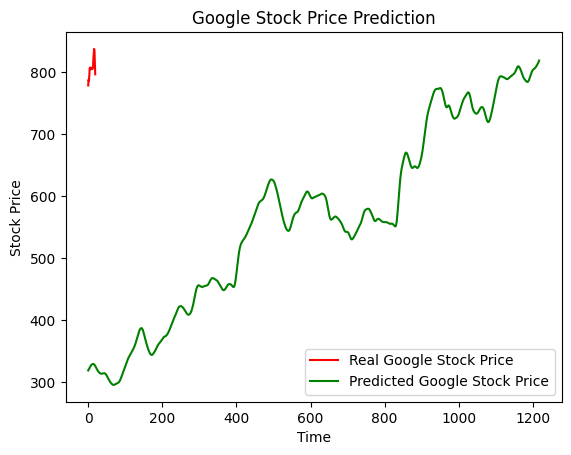

In [67]:
plt.plot(stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()